**Table of Contents**

1. [Import Libraries and Datasets](#1-import-libraries-and-datasets)
   - [Import Libraries](#import-libraries)
   - [Import Datasets](#import-datasets)
2. [Read the Data](#read-the-data)
3. [Preprocessing](#preprocessing)
   - [Column Procesing](#column-procesing)
   - [Encoder Categoric Variables](#encoder-categoric-variables)
4. [Search the Variables Highly Correlated with the Target Variable (Price)](#search-the-variables-highly-correlated-with-the-target-variable-price)
5. [Encode Categorical Variables](#encode-categorical-variables)
6. [Regression Modelling and Model Evaluation](#regression-modelling-and-model-evaluation)
   - [Data Split](#data-split)
   - [Normalization](#normalization)
   - [Train Regression Models](#train-regression-models)
     - [ElasticNet](#elasticnet)
     - [Stochastic Gradient Descent](#stochastic-gradient-descent)
     - [Support Vector Regression](#support-vector-regression)
     - [Random Forest](#random-forest)
     - [Boosting: Gradient Descent](#boosting-gradient-descent)
   - [Compare and Safe the Models](#compare-and-safe-the-models)
     - [Compare Models](#compare-models)
     - [Safe Models](#safe-models)
7. [Fast Machine Learning (Lazypredict)](#fast-machine-learning-lazypredict)

## Import libraries and download datasets

### Import libraries

In [57]:
# Data libraries
import numpy as np
import pandas as pd
import json
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

# Modelling
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as mse
from joblib import dump, load
from lazypredict.Supervised import LazyRegressor

### Import datasets

In [58]:
# We import the same dataset that we preprocesed before
data = pd.read_csv('../datasets/airbnb_limpio.csv')

## Read the data

In [59]:
# Listings dataset
data.head()

,id,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month
0,2539,Clean & quiet apt home by the park,Renovated apt home in elevator building.<br />...,Close to Prospect Park and Historic Ditmas Park,https://a0.muscache.com/pictures/3949d073-a02e...,2787,https://www.airbnb.com/users/show/2787,John,2008-09-07,"New York, NY",...,4.89,4.88,5.00,5.00,5.00,4.75,4.88,f,9,0.11
1,2595,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"New York, NY",...,4.68,4.73,4.63,4.77,4.80,4.81,4.40,f,3,0.31
2,5121,BlissArtsSpace!,One room available for rent in a 2 bedroom apt...,Heading into NYC or exploring the NY metro are...,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,Garon,2009-02-03,"New York, NY",...,4.52,4.22,4.09,4.91,4.91,4.47,4.52,f,2,0.31
3,45910,Beautiful Queens Brownstone! - 5BR,"<b>The space</b><br />Beautiful, fully furnish...",Heading into NYC or exploring the NY metro are...,https://a0.muscache.com/pictures/27117627/19ff...,204539,https://www.airbnb.com/users/show/204539,Mark,2010-08-17,"New York, NY",...,4.42,4.64,4.36,4.82,5.00,4.82,4.55,f,6,0.10
4,5136,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,Heading into NYC or exploring the NY metro are...,https://a0.muscache.com/pictures/miso/Hosting-...,7378,https://www.airbnb.com/users/show/7378,Rebecca,2009-02-03,"New York, NY",...,5.00,5.00,5.00,5.00,5.00,4.67,5.00,f,1,0.03


In [60]:
# Let's view the columns and row names of the main dataset
print('Cantidad de Filas y columnas:', data.shape)
print('Nombre columnas:', data.columns)

Cantidad de Filas y columnas: (39881, 48)
Nombre columnas: Index(['id', 'name', 'description', 'neighborhood_overview', 'picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bedrooms',
       'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'i

In [61]:
# To do this part of the project we will consider only half of the columns, so we will create a new dataset with the variables we need
df = data[['host_since', 'host_location', 'host_response_rate', 'host_is_superhost', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'property_type', 'room_type','accommodates', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_location', 'reviews_per_month']]

In [62]:
# Save clean df to csv
# df.to_csv('insideairbnb/df_short.csv', index=False)

## Preprocessing

### Column procesing

We will see if there are some variable that need some preprocessing.

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39881 entries, 0 to 39880
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_since                    39881 non-null  object 
 1   host_location                 39881 non-null  object 
 2   host_response_rate            39881 non-null  object 
 3   host_is_superhost             39881 non-null  object 
 4   neighbourhood                 39881 non-null  object 
 5   neighbourhood_cleansed        39881 non-null  object 
 6   neighbourhood_group_cleansed  39881 non-null  object 
 7   property_type                 39881 non-null  object 
 8   room_type                     39881 non-null  object 
 9   accommodates                  39881 non-null  int64  
 10  beds                          39881 non-null  float64
 11  price                         39881 non-null  float64
 12  minimum_nights                39881 non-null  int64  
 13  m

In [64]:
# We take a look at the numeric columns
df.iloc[:,9:].head()

,accommodates,beds,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_location,reviews_per_month
0,2,1.00,299.00,30,730,21,51,81,356,9,4.89,4.75,0.11
1,1,1.00,175.00,30,1125,0,0,5,280,49,4.68,4.81,0.31
2,2,1.00,60.00,30,730,5,30,60,335,50,4.52,4.47,0.31
3,16,10.00,403.50,30,730,30,60,90,365,13,4.42,4.82,0.10
4,4,2.00,275.00,21,1125,0,0,0,179,3,5.00,4.67,0.03


In [65]:
# We change the column beds to integer
df['beds'] = df['beds'].astype(int)

### Encoder categoric variables

In [66]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

In [67]:
# Loop through each column in the DataFrame except 'neighbourhood_cleansed'
for col in df.columns:
    if(df[col].dtype == 'object' and col != 'neighbourhood_cleansed'):
        df[col] = label_encoder.fit_transform(df[col])

In [68]:
# Label encoder to 'neighbourhood_cleansed'
etiquetas = df['neighbourhood_cleansed'].unique().tolist()

# Create a encoder dictionary
mapeo = {barrio: indice for indice, barrio in enumerate(etiquetas)} # save json

# Replace the neighbourhoods with numbers using the encoder dictionary
df.loc[:,'neighbourhood_cleansed'] = df['neighbourhood_cleansed'].replace(mapeo)

In [69]:
# Save json of the encoder for use in the app
file_path = '../files/mapeo.json'

# Save encoder file
with open(file_path, 'w') as file:
    json.dump(mapeo, file)

In [70]:
# Check if we have numeric variables only
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39881 entries, 0 to 39880
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_since                    39881 non-null  int32  
 1   host_location                 39881 non-null  int32  
 2   host_response_rate            39881 non-null  int32  
 3   host_is_superhost             39881 non-null  int32  
 4   neighbourhood                 39881 non-null  int32  
 5   neighbourhood_cleansed        39881 non-null  int64  
 6   neighbourhood_group_cleansed  39881 non-null  int32  
 7   property_type                 39881 non-null  int32  
 8   room_type                     39881 non-null  int32  
 9   accommodates                  39881 non-null  int64  
 10  beds                          39881 non-null  int32  
 11  price                         39881 non-null  float64
 12  minimum_nights                39881 non-null  int64  
 13  m

In [73]:
# Save clean df to csv
# df.to_csv('../datasets/df_encoded.csv', index=False)

## Search the variables highly correlated with the target variable (Price)

To determine which variables have the most significant relationship with your target variable 𝑦, you can use various statistical and machine learning techniques. We will use these common methods:

- ``Correlation Matrix``: For numerical variables, you can calculate the correlation matrix to see how each feature correlates with the target variable.

- ``Feature Importance`` from a Model: Train a machine learning model (like a decision tree, random forest, or gradient boosting model) and use the feature importance scores.

- ``Mutual Information``: This method can be used for both numerical and categorical variables to measure the dependency between variables.

- ``Chi-Square Test``: For categorical variables, you can use the chi-square test to determine the relationship between the features and the target variable.

### Correlation Matrix

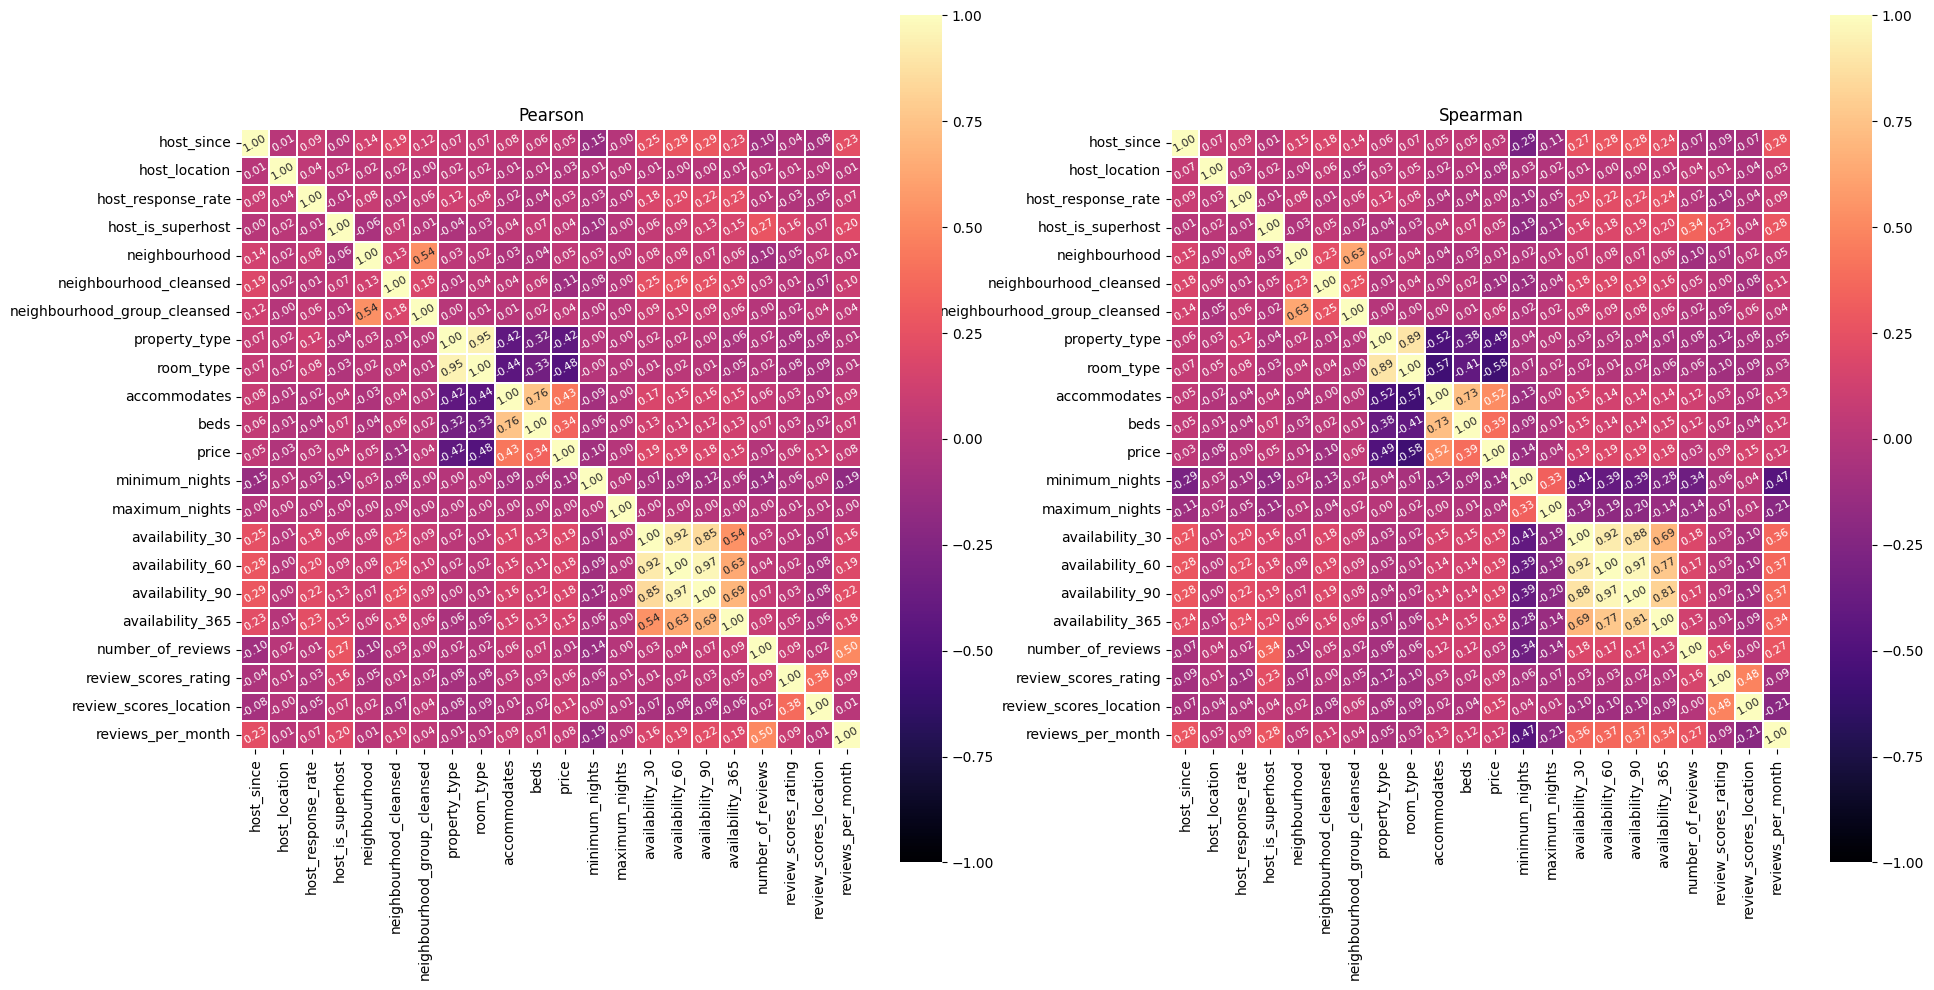

In [74]:
# We plot two correlation matrix
pearson_matrix = df.corr(method='pearson')
spearman_matrix = df.corr(method='spearman')

fig, ax =plt.subplots(1, 2, figsize=(22,11))
sns.heatmap(pearson_matrix, annot=True, annot_kws={"size": 8, 'rotation': 30}, vmin=-1.0, vmax=1.0, center=0, square=True, cmap="magma", linewidths=0.1, fmt='.2f', ax=ax[0])
sns.heatmap(spearman_matrix, annot=True, annot_kws={"size": 8, 'rotation': 30}, vmin=-1.0, vmax=1.0, center=0, square=True, cmap="magma", linewidths=0.1, fmt='.2f', ax=ax[1])
ax[0].set_title('Pearson')
ax[1].set_title('Spearman')
fig.show();

In [75]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Get correlation of all features with the target variable y
price_correlation = correlation_matrix[['price']].sort_values(by=['price'], ascending=False)
price_correlation

,price
price,1.00
accommodates,0.43
beds,0.34
availability_30,0.19
availability_90,0.18
availability_60,0.18
availability_365,0.15
review_scores_location,0.11
reviews_per_month,0.08
review_scores_rating,0.06


In [76]:
# Now we will separate the variables correlation to positive or negative 
positive_correlations = price_correlation[price_correlation['price'] > 0]
negative_correlations = price_correlation[price_correlation['price'] < 0].sort_values(by='price', ascending=True)

In [77]:
# We see te top positive and negative correlations
print(positive_correlations[['price']].head(5))
print('')
print(negative_correlations[['price']].head(5))

                 price
price             1.00
accommodates      0.43
beds              0.34
availability_30   0.19
availability_90   0.18

                        price
room_type               -0.48
property_type           -0.42
neighbourhood_cleansed  -0.11
minimum_nights          -0.10
host_location           -0.03


In [78]:
# Create a df with the variables that have a high correlation with the target variable (price)
# We will not consider property_type because it is similar to room_type and it can desviate predictions. 
# I have also included the 'neighbourhood_cleansed' because I want to train the model with that variable.
mldf = df[['room_type', 'accommodates', 'beds', 'neighbourhood_cleansed', 'price']]

In [22]:
# Save filtered df to csv
# mldf.to_csv('../datasets/df_predictor.csv', index=False)

## Regression modelling and model evaluation

### Data split

In [79]:
# Assign the independent variables and the dependent variable. Our target variable is price
X = mldf.drop(['price'], axis=1)
y = mldf['price']

In [80]:
# Split the data into training set and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

### Normalisation

In [81]:
# Initialising the scaler
scaler = StandardScaler()
 
# Normalise the training variables
X_train_scaled = scaler.fit_transform(X_train)
 
# Apply the same normalisation to the test.
X_test_scaled = scaler.transform(X_test)

In [94]:
# Save scaler 
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

### Train regression models:

#### ElasticNet

In [87]:
# Initialise model and parameters
alpha = 0.1 
l1_ratio = 0.1 
# Instance the model
model = ElasticNet(alpha = alpha, l1_ratio = l1_ratio, max_iter = 100, random_state = 0)
# Train model
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
mse_ElasticNet = mse(y_test, y_pred) 
mse_ElasticNet**.5

87.72245846330202

#### Stochastic Gradient Descent

In [88]:
# Initialise model and parameters
penalty = 'elasticnet' 
alpha = .1 
l1_ratio = .1 
# Instance the model
model1 = SGDRegressor(penalty = penalty, alpha = alpha, l1_ratio = l1_ratio, max_iter = 100, random_state = 0)
# Train model
model1.fit(X_train_scaled, y_train)
mse_SGDRegressor = mse(y_test,model1.predict(X_test_scaled))
print(mse_SGDRegressor**.5)

87.99614506959904


#### Support Vector Regression

In [89]:
# Initialise model and parameters
C = 1 
kernel = 'rbf'
# Instance the model
model2 = svm.SVR(C = C, kernel = kernel)
# Train model
model2.fit(X_train_scaled, y_train)
mse_SVR = mse(y_test,model2.predict(X_test_scaled))
print(mse_SVR**0.5)

88.06463393812318


#### Random Forest

In [90]:
# Initialise model and parameters
n_estimators = 200 
criterion = 'squared_error' 
max_depth = None 
min_samples_split = 2 
verbose = 1 
# Instance the model
model3 = RandomForestRegressor(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split, verbose=verbose)
# Train model
model3.fit(X_train_scaled, y_train)
mse_RF = mse(y_test,model3.predict(X_test_scaled))
print(mse_RF**.5)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


78.87424933016983


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished


#### Boosting: *Gradient Descent*

In [91]:
# Initialise model and parameters
params = {"booster":"gbtree", "max_depth": 2, "eta": 0.3, "objective": "reg:squarederror", "nthread":2}
num_boost_round = 10
# Convert the data to DMatrix format.
train_data = xgb.DMatrix(X_train_scaled, label=y_train)
test_data = xgb.DMatrix(X_test_scaled, label=y_test)
# Instance the model and train model
model4 = xgb.train(params = params, dtrain = train_data, num_boost_round=num_boost_round)
mse_XGB = mse(y_test,model4.predict(test_data))
print(mse_XGB**0.5)

84.47040367813291


### Compare and safe the models

#### Compare models

Text(0.5, 0, 'Model')

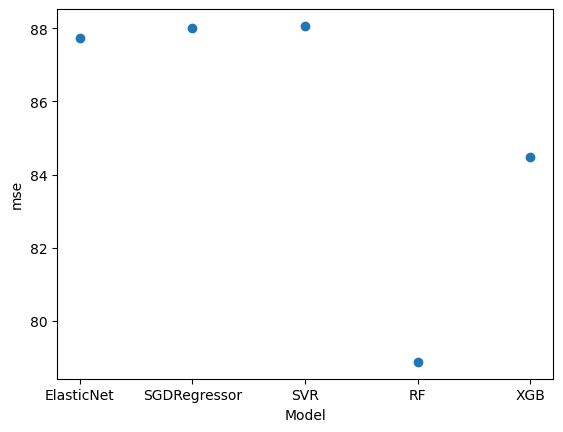

In [95]:
# Plot the accuracy of the models
mse = [mse_ElasticNet, mse_SGDRegressor, mse_SVR, mse_RF, mse_XGB]
rmse = [mse_ElasticNet**0.5, mse_SGDRegressor**0.5, mse_SVR**0.5, mse_RF**0.5, mse_XGB**0.5]
plt.scatter(['ElasticNet', 'SGDRegressor', 'SVR', 'RF', 'XGB'], rmse)
plt.ylabel('mse')
plt.xlabel('Model')

#### Safe models

In [99]:
# Save the trained model to a file
model_path = '../models/model.pkl'
joblib.dump(model2, model_path)

['../models/model.pkl']

## Fast machine learning (lazypredict)

In [115]:
# lazypredict
x_tr, x_ts, y_tr, y_ts= train_test_split(X,y,test_size=.3, random_state=42)

lazyReg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models2,predictions2 = lazyReg.fit(x_tr, x_ts, y_tr, y_ts)
models2

 21%|██▏       | 9/42 [00:02<00:11,  2.98it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


 76%|███████▌  | 32/42 [11:30<03:18, 19.82s/it]

QuantileRegressor model failed to execute
Unable to allocate 11.6 GiB for an array with shape (27916, 55844) and data type float64


100%|██████████| 42/42 [12:37<00:00, 18.03s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
XGBRegressor,0.51,0.51,74.59,0.19
LGBMRegressor,0.50,0.50,75.29,0.17
HistGradientBoostingRegressor,0.50,0.50,75.31,0.87
RandomForestRegressor,0.46,0.46,77.66,2.36
BaggingRegressor,0.45,0.45,78.54,0.22
GradientBoostingRegressor,0.45,0.45,78.70,1.02
ExtraTreesRegressor,0.43,0.43,80.13,1.78
KNeighborsRegressor,0.40,0.40,82.26,0.29
MLPRegressor,0.37,0.37,84.57,11.99
